# Interpolation

## Übungsblatt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


### Aufgabe 1

**1.** Lese die Daten in `Sprinterdaten.csv` ein und stelle diese grafisch dar.

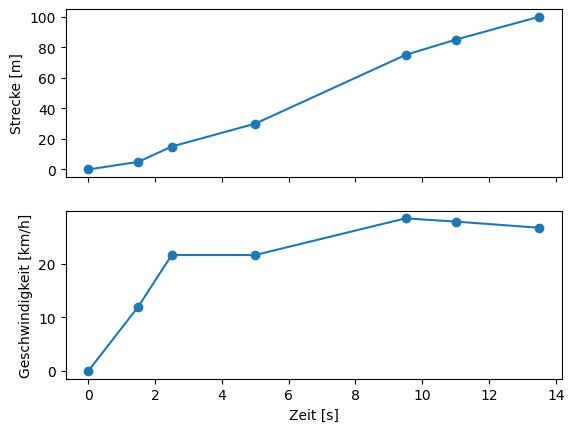

In [2]:
# Aufgabe 1.1

sprinter_data = np.loadtxt("Sprinterdaten.csv", delimiter=",", skiprows=1)
x, t, v = sprinter_data.T

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, x, "o-")
ax1.set_ylabel("Strecke [m]")
ax2.plot(t, v, "o-")
ax2.set_xlabel("Zeit [s]")
ax2.set_ylabel("Geschwindigkeit [km/h]")
plt.show()


**2.** Bestimme die Geschwindigkeit zum Zeitpunt $t = 8\,\text{s}$ mithilfe der linearen Interpolation und füge diesen Zeitpunkt in das Diagramm ein.

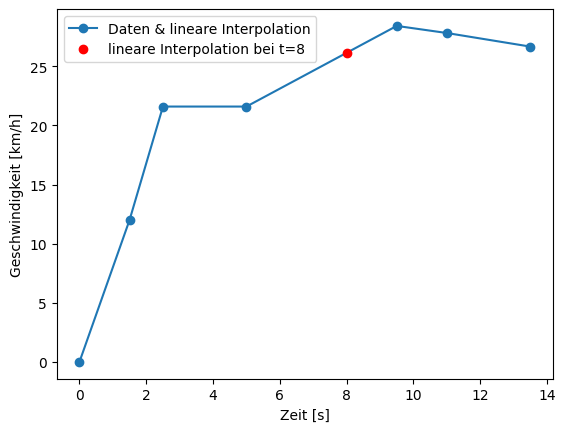

In [3]:
# Aufgabe 1.2

t0 = 8
i_upper = np.searchsorted(t, t0)
i_lower = i_upper - 1
delta_v = v[i_upper] - v[i_lower]
delta_t = t[i_upper] - t[i_lower]
m = delta_v / delta_t
v0 = m * (t0 - t[i_lower]) + v[i_lower]

plt.plot(t, v, "o-", label="Daten & lineare Interpolation")
plt.plot(t0, v0, "ro", label=f"lineare Interpolation bei t={t0}")
plt.xlabel("Zeit [s]")
plt.ylabel("Geschwindigkeit [km/h]")
plt.legend()
plt.show()


**3.** Berechne für die Sprinterdaten ein Interpolationspolynom vom Grad 6 oder weniger und stelle dieses auch grafisch dar (zusammen mit den Datenpunkten).

In [4]:
# Aufgabe 1.3: Interpolationspolynom

print("Wolfram|Alpha: interpolating polynomial", tuple(zip(t, v)))


Wolfram|Alpha: interpolating polynomial ((0.0, 0.0), (1.5, 12.0), (2.5, 21.6), (5.0, 21.6), (9.5, 28.42), (11.0, 27.82), (13.5, 26.67))


$$ p(x) = 0.00138547 x^6 - 0.0550288 x^5 + 0.805375 x^4 - 5.21824 x^3 + 13.3933 x^2 - 2.79903 x + 0 $$

[Siehe](https://www.wolframalpha.com/input?i=interpolating+polynomial+%28%280.0%2C+0.0%29%2C+%281.5%2C+12.0%29%2C+%282.5%2C+21.6%29%2C+%285.0%2C+21.6%29%2C+%289.5%2C+28.42%29%2C+%2811.0%2C+27.82%29%2C+%2813.5%2C+26.67%29%29)


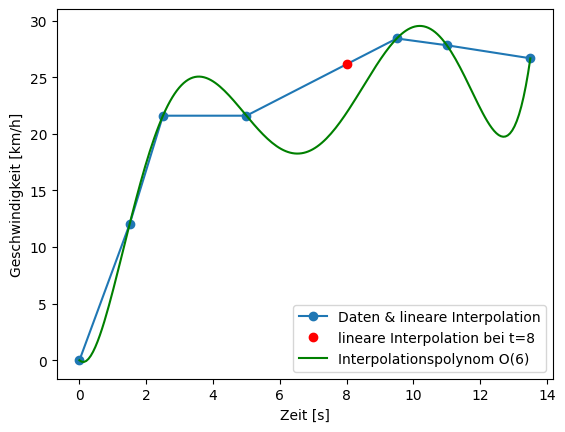

In [5]:
# Aufgabe 1.3


def p(x):
    return (
        0.00138547 * x**6
        - 0.0550288 * x**5
        + 0.805375 * x**4
        - 5.21824 * x**3
        + 13.3933 * x**2
        - 2.79903 * x
    )


t_p = np.linspace(t.min(), t.max(), 200)
v_p = p(t_p)

plt.plot(t, v, "o-", label="Daten & lineare Interpolation")
plt.plot(t0, v0, "ro", label=f"lineare Interpolation bei t={t0}")
plt.plot(t_p, v_p, "g-", label="Interpolationspolynom O(6)")
plt.xlabel("Zeit [s]")
plt.ylabel("Geschwindigkeit [km/h]")
plt.legend()
plt.show()


Alternativ gibt es in Numpy die beiden Funktionen [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) und [`np.polyval`](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html) mit deren Hilfe man ein Interpolationspolynom bestimmen und auswerten kann. Hier als Beispiel mal mit einem 

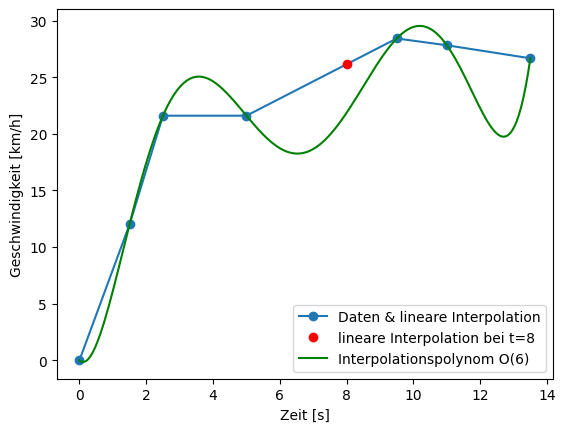

In [6]:
# Alternative

koeff = np.polyfit(t, v, 6)

t_p = np.linspace(t.min(), t.max(), 200)
v_p = np.polyval(koeff, t_p)

plt.plot(t, v, "o-", label="Daten & lineare Interpolation")
plt.plot(t0, v0, "ro", label=f"lineare Interpolation bei t={t0}")
plt.plot(t_p, v_p, "g-", label="Interpolationspolynom O(6)")
plt.xlabel("Zeit [s]")
plt.ylabel("Geschwindigkeit [km/h]")
plt.legend()
plt.show()


**4.** Stelle die Interpolation der SciPy funktion [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) grafisch dar.


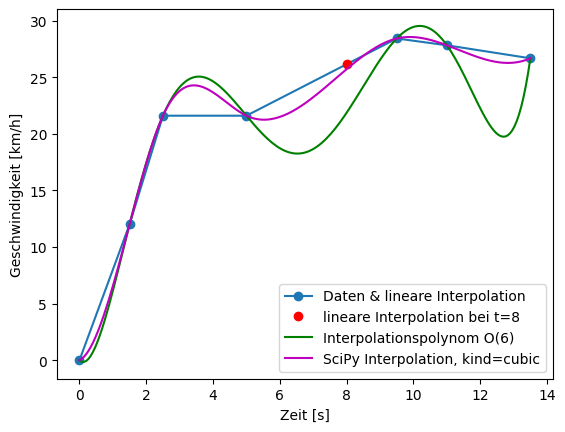

In [7]:
# Aufgabe 1.4

kind = "cubic"
# 'linear', 'nearest', 'nearest-up', 'zero', 'slinear',
# 'quadratic', 'cubic', 'previous', 'next'
predict = interpolate.interp1d(t, v, kind)

t2 = np.linspace(t.min(), t.max(), 200)
v2 = predict(t2)

plt.plot(t, v, "o-", label="Daten & lineare Interpolation")
plt.plot(t0, v0, "ro", label=f"lineare Interpolation bei t={t0}")
plt.plot(t_p, v_p, "g-", label="Interpolationspolynom O(6)")
plt.plot(t2, v2, "m-", label=f"SciPy Interpolation, kind={kind}")
plt.xlabel("Zeit [s]")
plt.ylabel("Geschwindigkeit [km/h]")
plt.legend()
plt.show()


### Aufgabe 2

**1.** Lese die Daten in `Alter_Groesse.csv` ein und stelle diese grafisch dar.

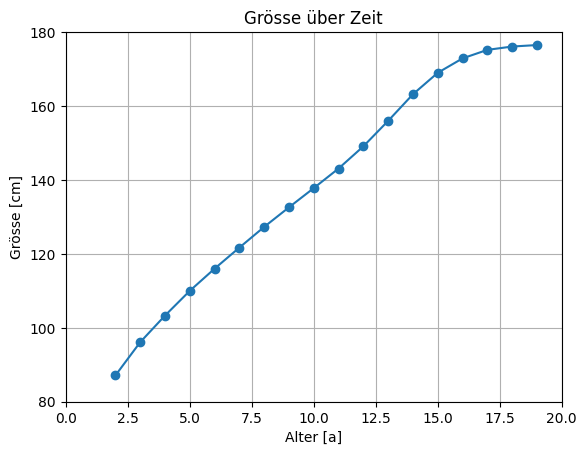

In [8]:
# Aufgabe 2.1

# Daten einlesen und plotten
alter_groesse = np.loadtxt("Alter_Groesse.csv", delimiter=";", skiprows=1)
age, size = alter_groesse.T

plt.plot(age, size, "o-")
plt.xlabel("Alter [a]")
plt.ylabel("Grösse [cm]")
plt.title("Grösse über Zeit")
plt.xlim(0, 20)
plt.ylim(80, 180)
plt.grid()
plt.show()


**2.** Bestimme die Grösse zum Zeitpunkt $a = 11$ mithilfe der linearen Interpolation und füge diesen Zeitpunkt in das Diagramm ein.

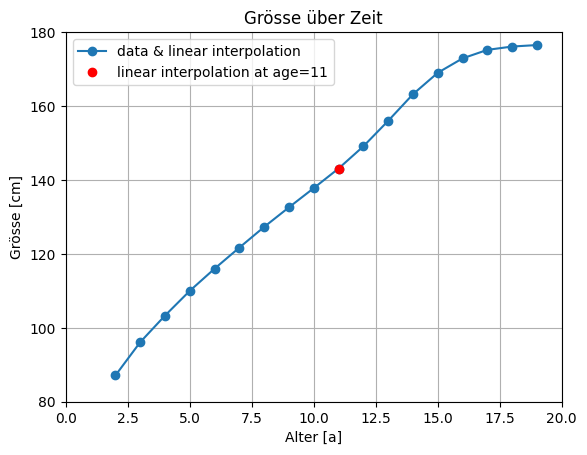

In [9]:
# Aufgabe 2.2
age0 = 11

i_upper = np.searchsorted(age, age0)
i_lower = i_upper - 1
delta_size = size[i_upper] - size[i_lower]
delta_age = age[i_upper] - age[i_lower]
m = delta_size / delta_age
size0 = m * (age0 - age[i_lower]) + size[i_lower]

plt.plot(age, size, "o-", label="data & linear interpolation")
plt.plot(age0, size0, "ro", label=f"linear interpolation at age={age0}")
plt.xlabel("Alter [a]")
plt.ylabel("Grösse [cm]")
plt.title("Grösse über Zeit")
plt.xlim(0, 20)
plt.ylim(80, 180)
plt.legend()
plt.grid()
plt.show()


**3.** Berechne mithilfe einer Koeffizientenmatrix ein Polynom maximal 6. Grades für die Sprinterdaten und stelle dieses auch grafisch dar (zusammen mit den Datenpunkten).

- Verwende hierfür die ersten 6 Datenpunkte


In [10]:
# 3. Interpolation mit Polynom
DataPoints = tuple(zip(age, size))
print("Wolfram|Alpha: interpolating polynomial", DataPoints[:7])


Wolfram|Alpha: interpolating polynomial ((2.0, 87.1), (3.0, 96.1), (4.0, 103.3), (5.0, 110.0), (6.0, 116.0), (7.0, 121.7), (8.0, 127.3))


$$ p(x) = 58.2 + 20.8642 x - 4.42931 x^2 + 0.738802 x^3 - 0.0705295 x^4 + 0.00347656 x^5 - 0.0000672743 x^6 $$

[Link](https://www.wolframalpha.com/input?i=interpolating+polynomial+%28%282.0%2C+87.1%29%2C+%284.0%2C+103.3%29%2C+%286.0%2C+116.0%29%2C+%288.0%2C+127.3%29%2C+%2810.0%2C+137.8%29%2C+%2812.0%2C+149.1%29%2C+%2814.0%2C+163.2%29%29)


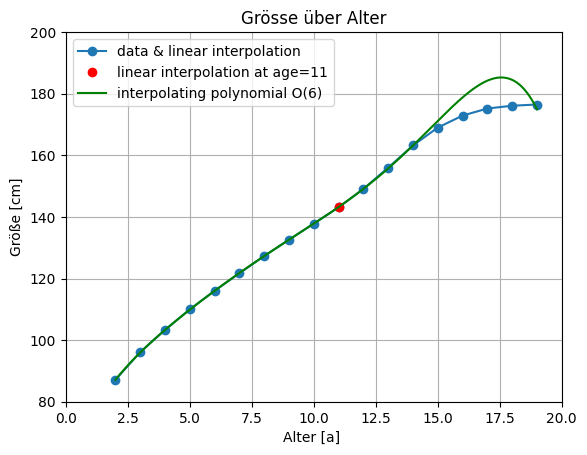

In [11]:
# Aufgabe 2.3
def p6(x):
    return (
        58.2
        + 20.8642 * x
        - 4.42931 * x**2
        + 0.738802 * x**3
        - 0.0705295 * x**4
        + 0.00347656 * x**5
        - 0.0000672743 * x**6
    )


age_p = np.linspace(age.min(), age.max(), 500)
size_p = p6(age_p)

plt.plot(age, size, "o-", label="data & linear interpolation")
plt.plot(age0, size0, "ro", label=f"linear interpolation at age={age0}")
plt.plot(age_p, size_p, "g-", label="interpolating polynomial O(6)")
plt.xlabel("Alter [a] ")
plt.ylabel("Größe [cm]")
plt.title("Grösse über Alter")
plt.xlim(0, 20)
plt.ylim(80, 200)
plt.legend()
plt.grid()
plt.show()


**Optional: Was ist das Problem einer Interpolation ausserhalb ihres Wertebereichs?**


Es ist keine Interpolation, sondern eine Extrapolation. Die Interpolationsfunktion ist so konstruiert, dass sie durch die gegebenen Punkte (Stützstellen) geht, aber nicht, dass sie ausserhalb des Bereichs eine sinnvolle Approximation der darunterliegenden Funktion darstellt.